<a href="https://colab.research.google.com/github/sponre01/ETL_Chicago_Divvy_vs_Taxi/blob/feature%2Fjonathan/divvy_ml_inv_jze_bikes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U -q PyDrive

In [0]:
_# Code to read csv file into Colaboratory:
#!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# Import Dependencies and Setup

import pandas as pd
import numpy as np
import os

In [0]:
Divvy_Trips_2017_Q4_file = 'https://drive.google.com/open?id=1LsLH9xeCHi_wSOr3dBhgXYJ2SHSmjYJM'
Divvy_Trips_2017_Q3_file = 'https://drive.google.com/open?id=1BEBDyOwJWuK0FWg4ZNJX2KFKD0Its3pX'
Divvy_Trips_2017_Q2_file = 'https://drive.google.com/open?id=1Qm0uXp539Cw3oa2GJZGOhMNRKbvEPSti'
Divvy_Trips_2017_Q1_file = 'https://drive.google.com/open?id=1v8nrcYBXBRyJpnDTtfjYcfDDlmI-uXgr'
Divvy_Trips_2016_Q4_file = 'https://drive.google.com/open?id=1QbjLwG_ULMbBbzhs56qosMcVkb-RPskL'
Divvy_Trips_2016_Q3_file = 'https://drive.google.com/open?id=1X_p8tT3POrRwJ9NnT8WpHTIzjdZVn_Cn'
Divvy_stations = 'https://drive.google.com/open?id=1jGN1qErbEXVcCfACmD8dLdpkXGFNnY0x'

In [0]:
fluff, id_2017_q4 = Divvy_Trips_2017_Q4_file.split('=')
fluff, id_2017_q3 = Divvy_Trips_2017_Q3_file.split('=')
fluff, id_2017_q2 = Divvy_Trips_2017_Q2_file.split('=')
fluff, id_2017_q1 = Divvy_Trips_2017_Q1_file.split('=')
fluff, id_2016_q4 = Divvy_Trips_2016_Q4_file.split('=')
fluff, id_2016_q3 = Divvy_Trips_2016_Q3_file.split('=')

In [0]:
fluff, station_file = Divvy_stations.split('=')
station_file

In [0]:
downloaded = drive.CreateFile({'id':id_2017_q4}) 
downloaded.GetContentFile('Filename_17_q4.csv')  
df_2017_q4 = pd.read_csv('Filename_17_q4.csv')
downloaded = drive.CreateFile({'id':id_2017_q3}) 
downloaded.GetContentFile('Filename_17_q3.csv') 
df_2017_q3 = pd.read_csv('Filename_17_q3.csv')
downloaded = drive.CreateFile({'id':id_2017_q2}) 
downloaded.GetContentFile('Filename_17_q2.csv') 
df_2017_q2 = pd.read_csv('Filename_17_q2.csv')
downloaded = drive.CreateFile({'id':id_2017_q1}) 
downloaded.GetContentFile('Filename_17_q1.csv') 
df_2017_q1 = pd.read_csv('Filename_17_q1.csv')
downloaded = drive.CreateFile({'id':id_2016_q3}) 
downloaded.GetContentFile('Filename_16_q4.csv') 
df_2016_q4 = pd.read_csv('Filename_16_q4.csv')
downloaded = drive.CreateFile({'id':id_2016_q3}) 
downloaded.GetContentFile('Filename_16_q3.csv') 
df_2016_q3 = pd.read_csv('Filename_16_q3.csv')
downloaded = drive.CreateFile({'id':station_file}) 

downloaded.GetContentFile('Filename_station.csv') 
df_stations = pd.read_csv('Filename_station.csv')

In [0]:

df_stations = df_stations.set_index('id')

df_stations = df_stations.drop(columns=['name','city','online_date'])

In [0]:
df_2016_q3['starttime']= pd.to_datetime(df_2016_q3['starttime'],format = '%m/%d/%Y %H:%M:%S')
df_2016_q4['starttime']= pd.to_datetime(df_2016_q4['starttime'],format = '%m/%d/%Y %H:%M:%S')
df_2017_q1['start_time'] = pd.to_datetime(df_2017_q1['start_time'],format = '%m/%d/%Y %H:%M:%S')
df_2017_q2['start_time'] = pd.to_datetime(df_2017_q2['start_time'],format = '%m/%d/%Y %H:%M:%S')
df_2017_q3['start_time'] = pd.to_datetime(df_2017_q3['start_time'],format = '%m/%d/%Y %H:%M:%S')
df_2017_q4['start_time'] = pd.to_datetime(df_2017_q4['start_time'],format = '%m/%d/%Y %H:%M')

In [0]:
d===

In [0]:
df_2017_q4.tail()

In [0]:
df_2016_q3.head()

In [10]:
# Combine Trips Divvy Data File and store into Pandas DataFrame

df_2017_Q3Q4_df = df_2017_q4.append(df_2017_q3)
df_2017_Q2Q3Q4_df = df_2017_Q3Q4_df.append(df_2017_q2)
df_2017_df = df_2017_Q2Q3Q4_df.append(df_2017_q1)
#df_2017_df.head()
df_2016_df = df_2016_q3.append(df_2016_q4)
df_tot = df_2017_df.append(df_2016_df)
df_tot.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,bikeid,birthyear,end_time,from_station_id,from_station_name,gender,start_time,starttime,stoptime,to_station_id,to_station_name,trip_id,tripduration,usertype
0,3304,1988.0,1/1/2018 0:03,159,Claremont Ave & Hirsch St,Male,2017-12-31 23:58:00,NaT,NaN,69,Damen Ave & Pierce Ave,17536701,284,Subscriber
1,5975,NaN,1/1/2018 0:18,145,Mies van der Rohe Way & Chestnut St,NaN,2017-12-31 23:54:00,NaT,NaN,145,Mies van der Rohe Way & Chestnut St,17536700,1402,Customer
2,4906,NaN,1/1/2018 0:18,145,Mies van der Rohe Way & Chestnut St,NaN,2017-12-31 23:54:00,NaT,NaN,145,Mies van der Rohe Way & Chestnut St,17536699,1441,Customer
3,5667,1963.0,12/31/2017 23:53,340,Clark St & Wrightwood Ave,Male,2017-12-31 23:48:00,NaT,NaN,143,Sedgwick St & Webster Ave,17536698,315,Subscriber
4,5353,1977.0,12/31/2017 23:47,240,Sheridan Rd & Irving Park Rd,Male,2017-12-31 23:42:00,NaT,NaN,245,Clarendon Ave & Junior Ter,17536697,272,Subscriber


In [0]:
df_tot['start_time'] = df_tot['start_time'].fillna(df_tot['starttime'])

In [0]:
df_tot = df_tot.drop(columns=['starttime','end_time','stoptime'])

In [0]:
# ne
df_tot.sort_values(by=['tripduration'],ascending=False)

In [0]:
#large trip durations skewing nn. Possibly stolen  bikes. Limiting to rentals less than 12 hour
df_tot =  df_tot[df_tot['tripduration']< 4320] 

In [0]:
df_slim = df_tot

In [0]:
df_slim = df_slim.join(df_stations,on='from_station_id',rsuffix='_from')
df_slim = df_slim.join(df_stations,on='to_station_id',rsuffix='_to')

In [0]:
df_time = df_slim

In [0]:
df_time['year'] = df_time['start_time'].dt.year
df_time['dayofyear'] = df_time['start_time'].dt.dayofyear
df_time['time']= df_time['start_time'].dt.time
df_time['weekday'] = df_time['start_time'].dt.weekday

In [0]:
import holidays
us_holidays = holidays.US()
df_time['holiday'] = df_time['start_time'].dt.date.isin(us_holidays)


In [0]:
df_time['time_in_sec'] = df_time['start_time'].dt.hour*360 +df_time['start_time'].dt.minute*60+df_time['start_time'].dt.second

In [0]:
df_time['usertype'].unique()

In [0]:
df_slim = df_slim.set_index('trip_id')

In [0]:
# Filepaths, numpy, and Tensorflow
import os
import numpy as np
import tensorflow as tf
# Sklearn scaling
from sklearn.preprocessing import MinMaxScaler

In [22]:
# Keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense
from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
df_time.dtypes

In [0]:
X_full = df_slim[['birthyear','gender','tripduration','usertype','dayofyear','weekday','holiday','time_in_sec','latitude','longitude','latitude_to','longitude_to']]

In [0]:
X_full = X_full.dropna()

In [0]:
X_full.dtypes
X_full['usertype'].unique()

array(['Subscriber', 'Customer', 'Dependent'], dtype=object)

In [0]:
from keras.utils import to_categorical

In [0]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(X_full['gender'])
encoded_gender = label_encoder.transform(X_full['gender'].astype(str))
X_full['gender'] = encoded_gender

In [0]:

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(X_full['holiday'])
encoded_gender = label_encoder.transform(X_full['holiday'].astype(bool))
X_full['holiday'] = encoded_gender

In [0]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(X_full['usertype'])
encoded_gender = label_encoder.transform(X_full['usertype'].astype(str))
X_full['usertype'] = encoded_gender

In [0]:
X_full.dtypes

In [0]:
y = X_full['gender']
t = X_full['tripduration'].values

In [0]:
X_g = X_full.drop(columns =['gender'])
X_t = X_full.drop(columns = ['tripduration','longitude_to','latitude_to'])

In [0]:
X_full.sort_values(by=['tripduration'],ascending=False)

In [0]:
y_g = to_categorical(X_full['gender'])

In [0]:
y_g

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_g, y_g)
X_train_t, X_test_t, t_train, t_test= train_test_split(X_t,t)

In [55]:
from sklearn.preprocessing import StandardScaler
X_train_t, X_test_t, t_train, t_test= train_test_split(X_t,t)
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
# Transform the training and testing data using the X_scaler

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a StandardScater model and fit it to the training data
#X_scaler_t = StandardScaler().fit(X_train_t)
# Transform the training and testing data using the X_scaler

#X_train_scaled_t = X_scaler_t.transform(X_train_t)
#X_test_scaled_t = X_scaler_t.transform(X_test_t)

from sklearn.preprocessing import  MinMaxScaler
X_scaler_t = StandardScaler().fit(X_train_t)
#sc= MinMaxScaler()
X_train_scaled_t= X_scaler_t.transform(X_train_t)
X_test_scaled = X_scaler_t.transform(X_test_t)
#X_test_scaled_t = sc.fit_transform
t= t.reshape(-1,1)
t=sc.fit_transform(t)
#X_train_t, X_test_t, t_train, t_test= train_test_split(X_t,t)
#t_scaler = StandardScaler().fit(t_train)
#t_trained_scaled = t_scaler.transform(t_train)
#t_test_scaled = t_scaler.transfor(t_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/usr/local/lib/python3.6/dist-pack

In [56]:
t.max()

1.0

In [45]:
# first, create a normal neural network with 2 inputs, 6 hidden nodes, and 2 outputs
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=24, activation='relu', input_dim=11))
model.add(Dense(units=2, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
X_train

In [0]:
# Fit the model to the training data
model.fit(
    X_train_scaled,
    y_train,
    epochs=50,
    shuffle=True,
    verbose=2
)

In [0]:

model.save("bigTry.h5")

In [0]:
from keras import Sequential
from keras.layers import Dense
def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units=13, input_dim=9))
    regressor.add(Dense(units=1))
    regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae','accuracy'])
    return regressor

In [0]:
from keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=build_regressor, batch_size=32,epochs=25,verbose=2)

In [59]:
results=regressor.fit(X_train_t,t_train)

Epoch 1/25
 - 101s - loss: 202576.0435 - mean_absolute_error: 345.3033 - acc: 8.2153e-04
Epoch 2/25
 - 101s - loss: 201307.1380 - mean_absolute_error: 344.1755 - acc: 8.4097e-04
Epoch 3/25
 - 100s - loss: 200891.5296 - mean_absolute_error: 343.7652 - acc: 8.4310e-04
Epoch 4/25
 - 101s - loss: 200733.3594 - mean_absolute_error: 343.5815 - acc: 8.0901e-04
Epoch 5/25
 - 100s - loss: 200650.1499 - mean_absolute_error: 343.5064 - acc: 8.0529e-04
Epoch 6/25
 - 99s - loss: 200596.1548 - mean_absolute_error: 343.4541 - acc: 8.2313e-04
Epoch 7/25
 - 100s - loss: 200538.2074 - mean_absolute_error: 343.3857 - acc: 8.1194e-04
Epoch 8/25
 - 99s - loss: 200506.0253 - mean_absolute_error: 343.3435 - acc: 8.3058e-04
Epoch 9/25
 - 100s - loss: 200468.2508 - mean_absolute_error: 343.3096 - acc: 8.0395e-04
Epoch 10/25
 - 100s - loss: 200454.4258 - mean_absolute_error: 343.2962 - acc: 8.4976e-04
Epoch 11/25
 - 99s - loss: 200433.8208 - mean_absolute_error: 343.2800 - acc: 8.0529e-04
Epoch 12/25
 - 99s - l

In [0]:
regressor.model.save('timedurCutOff2.h5')
from google.colab import files
files.download('timedurCutOff2.h5')

In [0]:
t_pred= regressor.predict(X_test_t)


In [62]:
print(t_pred.min(), t_pred.max())

558.96295 873.8133


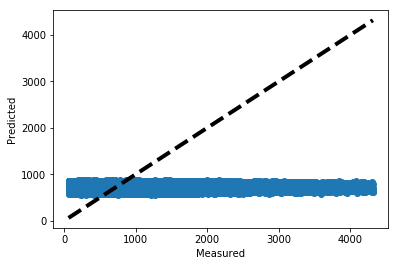

In [63]:
import matplotlib.pyplot as plt
ig, ax = plt.subplots()
ax.scatter(t_test, t_pred)
ax.plot([t_test.min(), t_test.max()],[t_test.min(), t_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [0]:
df_group = df_slim.groupby(by=['from_station_id','year','dayofyear'])

In [0]:
bikes_stat = df_group.agg({'bikeid':'count','latitude':'max','longitude':max,'holiday':sum,'weekday':'mean','dpcapacity':'mean'})

In [0]:
bikes_stat = bikes_stat.reset_index()

In [0]:
bikes_stat = bikes_stat.dropna()

In [0]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(bikes_stat['holiday'])
encoded_gender = label_encoder.transform(bikes_stat['holiday'].astype(bool))
bikes_stat['holiday'] = encoded_gender

In [119]:
bikes_stat  = bikes_stat.drop(columns=['from_station_id'])

KeyError: ignored

In [120]:
X_b = bikes_stat[['dayofyear','latitude','longitude','holiday','weekday','dpcapacity']]
b = bikes_stat['bikeid'].values.reshape(-1, 1)
print(X_b.shape, b.shape)

(212737, 6) (212737, 1)


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_b, b, random_state=34)

In [122]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [123]:

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [124]:
### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

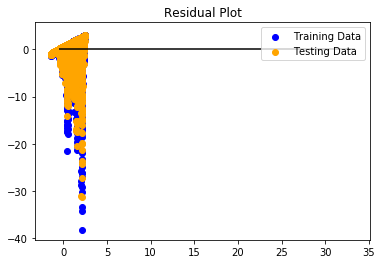

In [125]:
### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [128]:
 # Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.7866539698889106, R2: 0.24447590272329067


In [129]:
 # LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.7878654562300718, R2: 0.24331235793828418


In [0]:
from keras import Sequential
from keras.layers import Dense
def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units=13, input_dim=6))
    regressor.add(Dense(units=1))
    regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae','accuracy'])
    return regressor

In [0]:
from keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=build_regressor, batch_size=32,epochs=1000,verbose=2)

In [136]:
results=regressor.fit(X_train,y_train)

Epoch 1/1000
 - 5s - loss: 3278.2631 - mean_absolute_error: 29.7900 - acc: 0.0110
Epoch 2/1000
 - 4s - loss: 2504.8055 - mean_absolute_error: 25.5202 - acc: 0.0175
Epoch 3/1000
 - 4s - loss: 2504.5402 - mean_absolute_error: 25.5480 - acc: 0.0163
Epoch 4/1000
 - 4s - loss: 2504.7615 - mean_absolute_error: 25.5287 - acc: 0.0171
Epoch 5/1000
 - 4s - loss: 2504.3050 - mean_absolute_error: 25.5384 - acc: 0.0169
Epoch 6/1000
 - 4s - loss: 2505.0136 - mean_absolute_error: 25.5250 - acc: 0.0170
Epoch 7/1000
 - 4s - loss: 2503.7281 - mean_absolute_error: 25.5124 - acc: 0.0169
Epoch 8/1000
 - 4s - loss: 2502.4316 - mean_absolute_error: 25.5220 - acc: 0.0171
Epoch 9/1000
 - 4s - loss: 2503.1419 - mean_absolute_error: 25.5131 - acc: 0.0170
Epoch 10/1000
 - 5s - loss: 2502.3420 - mean_absolute_error: 25.5045 - acc: 0.0167
Epoch 11/1000
 - 5s - loss: 2502.9750 - mean_absolute_error: 25.5067 - acc: 0.0170
Epoch 12/1000
 - 4s - loss: 2500.1537 - mean_absolute_error: 25.5005 - acc: 0.0166
Epoch 13/1000

In [0]:
b_pred= regressor.predict(X_test)


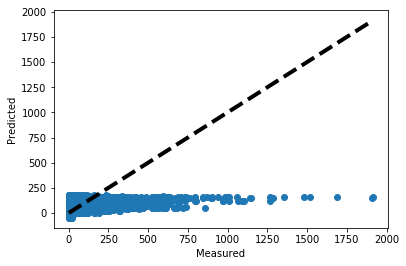

In [138]:
import matplotlib.pyplot as plt
ig, ax = plt.subplots()
ax.scatter(y_test, b_pred)
ax.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [0]:
regressor.model.save('bikeCount.h5')
from google.colab import files
files.download('bikeCount.h5')

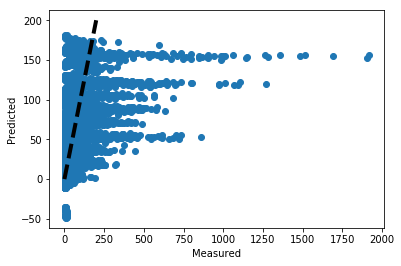

In [142]:
import matplotlib.pyplot as plt
ig, ax = plt.subplots()
ax.scatter(y_test, b_pred)
ax.plot([0, 200],[0, 200], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()